## Assignment 2
In  this  part  of  the  exercise,  you  will  build  a  logistic  regression  model  to predict whether a student gets admitted into a university. 

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You  have  historical  data  from  previous  applicantsthat you can use as a training set for logistic regression.  For each training example, you have the applicant’s scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

%matplotlib inline

In [2]:
# Loading Data
ex2_df = pd.read_csv('ex2data1.txt')
ex2_df.head()

,exam1,exam2,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


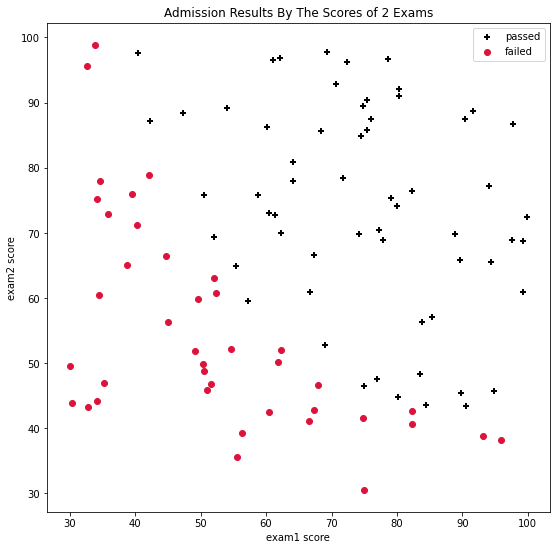

In [3]:
# Data visualisation
passed = ex2_df[ex2_df['result'].isin([1])]
failed = ex2_df[ex2_df['result'].isin([0])]

fig, ax = plt.subplots(figsize=(9,9))

ax.scatter(passed['exam1'], passed['exam2'], marker='+', c='k', lw=2, label='passed')
ax.scatter(failed['exam1'], failed['exam2'], marker='o', c='crimson', label='failed')
ax.set_xlabel('exam1 score')
ax.set_ylabel('exam2 score')
ax.set_title('Admission Results By The Scores of 2 Exams')
ax.legend(loc=1)

plt.show()

In [4]:
# Adding a column of 1's
ex2_df.insert(0,'ones',1)
ex2_df.head()

,ones,exam1,exam2,result
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [5]:
# Extracting X and y dataframes
X_df = ex2_df.iloc[:,:-1]
y_df = ex2_df.iloc[:,-1]

# setting m, n as dimentions of the X data frame, and itial theta as 0's
m, n = X_df.shape
theta = np.zeros((n,1))

In [6]:
# converting X and y dataframes into numpy arrays
X = np.array(X_df)
y = np.array(y_df).reshape(100,1)

print("X has dimentions {}, y has dimentions {}".format(X.shape, y.shape))

X has dimentions (100, 3), y has dimentions (100, 1)


In [7]:
# Sigmoid function, is needed to transofrm predictions into range 0-1
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
# Cost function
def computeCost(theta, X, y):
    h = sigmoid(np.dot(X,theta))
    if_pass = np.multiply(-y, np.log(h)) #if y=1, this cost function is applied, and the other = 1-1 =0
    if_fail = np.multiply(-(1-y), np.log(1-h)) #if y=0, this cost function is applied
    
    J = 1/m * np.sum(if_pass + if_fail)
    
    return J

In [9]:
# Compute gradients of the cost function (needed for optimization of theta)
def computeGradients(theta, X, y):
    h = sigmoid(np.dot(X,theta))
    grad = (1/m) * np.dot((h-y).T, X)
    
    return grad

In [10]:
# Check to see if cost function is working
J = computeCost(theta, X, y)
grad = computeGradients(theta, X, y)

print("Cost function for theta=[[0;0;0]] is {}".format(J))
print("Gradients are {}".format([i for i in grad]))

Cost function for theta=[[0;0;0]] is 0.6931471805599453
Gradients are [array([ -0.1       , -12.00921659, -11.26284221])]


In [11]:
test_theta = np.array((-24, 0.2, 0.2)).reshape(3,1)

J2 = computeCost(test_theta, X, y)
grad2 = computeGradients(test_theta, X, y)

print("Cost function for theta=[-24;0.2;0.2] is {}".format(J2))
print("Gradients are {}".format([i for i in grad2]))

Cost function for theta=[-24;0.2;0.2] is 0.21833019382659785
Gradients are [array([0.04290299, 2.56623412, 2.64679737])]


In [12]:
# Minimize a function using truncated Newton Algorithm from Scipy
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_tnc.html#scipy.optimize.fmin_tnc

optimize = opt.fmin_tnc(func=computeCost, x0=theta.flatten(), fprime=computeGradients, args=(X,y.flatten()))

theta_opt = optimize[0].reshape(3,1)
eval_num = optimize[1]

J_opt = computeCost(theta_opt, X, y)

print('Theta after {} evaluations reached local minima at: {}'.format(eval_num, [float(i) for i in theta_opt]))
print('Cost function after optimization: {}'.format(J_opt))

Theta after 36 evaluations reached local minima at: [-25.161318652638773, 0.20623158870213387, 0.20147148644597018]
Cost function after optimization: 0.20349770158947458


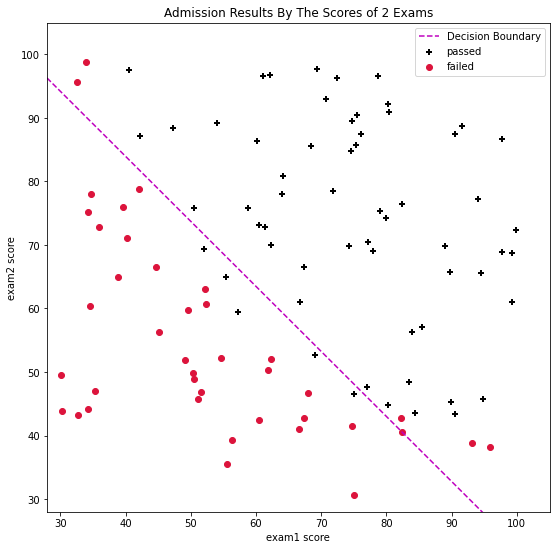

In [13]:
# Decision Boundary Graph
fig, ax = plt.subplots(figsize=(9,9))

#decision boundary x and y axis
xx = np.linspace(20,110,1100)
yy = (-theta_opt[0] - theta_opt[1]*xx)/theta_opt[2]

ax.set_xlim([28,105])
ax.set_ylim([28,105])

#plot decision boundary
plt.plot(xx, yy, '--m', label='Decision Boundary')

ax.scatter(passed['exam1'], passed['exam2'], marker='+', c='k', lw=2, label='passed')
ax.scatter(failed['exam1'], failed['exam2'], marker='o', c='crimson', label='failed')
ax.set_xlabel('exam1 score')
ax.set_ylabel('exam2 score')
ax.set_title('Admission Results By The Scores of 2 Exams')
ax.legend(loc=1)

plt.show()

In [14]:
# Function that decides if student is admitted or not
def pass_fail(X, theta):
    prob = float(sigmoid(np.dot(X,theta)))
    
    if prob >= 0.5:
        return 1
    else:
        return 0

In [15]:
# Prediction function, outputs an array of predictions
def prediction(theta, X):
    X_pred_list = []
    rows = 0
    
    for i in X:
        X_pred_list.append(pass_fail(i,theta))
        rows += 1
        
    X_pred = np.array(X_pred_list).reshape(rows,1)
    
    return X_pred

In [16]:
# Count Accuracy by comparing y values with the predictions
def accuracy(predictions, y):
    total = 0 
    
    for i in range(len(predictions)):
        if int(predictions[i]) == int(y[i]):
            total += 1
            
    return total/len(y)

In [17]:
predictions = prediction(theta_opt, X)
acc = accuracy(predictions, y.flatten())

print('The total accuracy of our predictions is: {}%'.format(acc*100))

The total accuracy of our predictions is: 89.0%


## Regularized Logistic Regression

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

In [18]:
#r ead date
ex2r_df = pd.read_csv('ex2data2.txt')
ex2r_df.head()

,test1,test2,result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


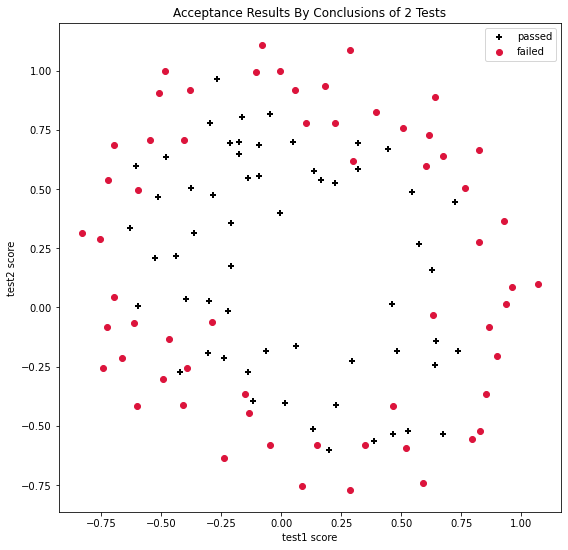

In [19]:
# Data visualisation
passed_2 = ex2r_df[ex2r_df['result'].isin([1])]
failed_2 = ex2r_df[ex2r_df['result'].isin([0])]

fig, ax = plt.subplots(figsize=(9,9))

ax.scatter(passed_2['test1'], passed_2['test2'], marker='+', c='k', lw=2, label='passed')
ax.scatter(failed_2['test1'], failed_2['test2'], marker='o', c='crimson', label='failed')
ax.set_xlabel('test1 score')
ax.set_ylabel('test2 score')
ax.set_title('Acceptance Results By Conclusions of 2 Tests')
ax.legend(loc=1)

plt.show()

In [20]:
# Feature Mapping
def mapFeatures(X1, X2, degree):
    # Make a copy
    ex2r_df_fmap = ex2r_df.copy()
    
    for i in range(1, degree+1):
        for j in range(0, i+1):
            ex2r_df_fmap[str(i)+str(j)+'_polynomial'] = np.power(X1, i-j) * np.power(X2, j)  

    ex2r_df_fmap.drop('test1', axis=1, inplace=True)
    ex2r_df_fmap.drop('test2', axis=1, inplace=True)
    ex2r_df_fmap.insert(1,'ones',1)
    
    return ex2r_df_fmap

In [21]:
# Parameters for Feature Mapping
degree = 6
X1 = ex2r_df['test1']
X2 = ex2r_df['test2']

ex2r_df_fmap = mapFeatures(X1, X2, degree)

In [22]:
# data after feature mapping
ex2r_df_fmap

,result,ones,10_polynomial,11_polynomial,20_polynomial,21_polynomial,22_polynomial,30_polynomial,31_polynomial,32_polynomial,...,53_polynomial,54_polynomial,55_polynomial,60_polynomial,61_polynomial,62_polynomial,63_polynomial,64_polynomial,65_polynomial,66_polynomial
0,1,1,0.051267,0.699560,0.002628,0.035864,0.489384,1.347453e-04,0.001839,0.025089,...,0.000900,1.227829e-02,1.675424e-01,1.815630e-08,2.477505e-07,3.380660e-06,4.613055e-05,6.294709e-04,8.589398e-03,1.172060e-01
1,1,1,-0.092742,0.684940,0.008601,-0.063523,0.469143,-7.976812e-04,0.005891,-0.043509,...,0.002764,-2.041205e-02,1.507518e-01,6.362953e-07,-4.699318e-06,3.470651e-05,-2.563226e-04,1.893054e-03,-1.398103e-02,1.032560e-01
2,1,1,-0.213710,0.692250,0.045672,-0.147941,0.479210,-9.760555e-03,0.031616,-0.102412,...,0.015151,-4.907685e-02,1.589699e-01,9.526844e-05,-3.085938e-04,9.995978e-04,-3.237900e-03,1.048821e-02,-3.397345e-02,1.100469e-01
3,1,1,-0.375000,0.502190,0.140625,-0.188321,0.252195,-5.273438e-02,0.070620,-0.094573,...,0.017810,-2.385083e-02,3.194040e-02,2.780914e-03,-3.724126e-03,4.987251e-03,-6.678793e-03,8.944062e-03,-1.197765e-02,1.604015e-02
4,1,1,-0.513250,0.465640,0.263426,-0.238990,0.216821,-1.352032e-01,0.122661,-0.111283,...,0.026596,-2.412849e-02,2.189028e-02,1.827990e-02,-1.658422e-02,1.504584e-02,-1.365016e-02,1.238395e-02,-1.123519e-02,1.019299e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0,1,-0.720620,0.538740,0.519293,-0.388227,0.290241,-3.742131e-01,0.279764,-0.209153,...,0.081199,-6.070482e-02,4.538330e-02,1.400354e-01,-1.046913e-01,7.826790e-02,-5.851357e-02,4.374511e-02,-3.270412e-02,2.444980e-02
114,0,1,-0.593890,0.494880,0.352705,-0.293904,0.244906,-2.094682e-01,0.174547,-0.145447,...,0.042748,-3.562096e-02,2.968243e-02,4.387691e-02,-3.656200e-02,3.046659e-02,-2.538737e-02,2.115493e-02,-1.762810e-02,1.468924e-02
115,0,1,-0.484450,0.999270,0.234692,-0.484096,0.998541,-1.136964e-01,0.234520,-0.483743,...,0.234178,-4.830370e-01,9.963553e-01,1.292688e-02,-2.666414e-02,5.499985e-02,-1.134476e-01,2.340073e-01,-4.826843e-01,9.956280e-01
116,0,1,-0.006336,0.999270,0.000040,-0.006332,0.998541,-2.544062e-07,0.000040,-0.006327,...,0.000040,-6.317918e-03,9.963553e-01,6.472253e-14,-1.020695e-11,1.609667e-09,-2.538495e-07,4.003286e-05,-6.313306e-03,9.956280e-01


In [23]:
# extract X and y dataframes from data
X_reg_df = ex2r_df_fmap.iloc[:,1:]
y_reg_df = ex2r_df_fmap.iloc[:,0]

# convert X and y dataframes to numpy arrays
Xr = np.array(X_reg_df)
yr = np.array(y_reg_df).reshape(118, 1)

# set m, n as dimentions of X dataframe, thetar as initial theta of 0's
m, n = X_reg_df.shape
thetar = np.zeros((n,1))

In [24]:
print("Xr has dimentions {}, yr has dimentions {}".format(Xr.shape, yr.shape))

Xr has dimentions (118, 28), yr has dimentions (118, 1)


In [25]:
# Cost function
def computeCost_reg(thetar, Xr, yr, Lambda):
    h = sigmoid(np.dot(Xr,thetar))
    if_pass = np.multiply(-yr, np.log(h)) #if y=1, this cost function is applied, and the other = 1-1 =0
    if_fail = np.multiply(-(1-yr), np.log(1-h)) #if y=0, this cost function is applied
    
    reg_term = (Lambda/(2*m)) * np.sum(theta[1:]**2)
    
    J = 1/m * ( np.sum(if_pass + if_fail) + reg_term )
    
    return J

In [26]:
# compute gradients
def computeGradients_reg(thetar, Xr, yr, Lambda):
    h = sigmoid(np.dot(Xr,thetar))
    grad = np.zeros([m,1])
    
    grad = (1/m) * np.dot(Xr.T, (h - yr))
    grad[1:] = grad[1:] + (Lambda / m) * thetar[1:]
    
    return grad

In [27]:
# checking if the cost function and compute gradients work
Jr = computeCost_reg(thetar, Xr, yr, 1)
gradr = computeGradients_reg(thetar, Xr, yr, 1)
print("Cost function for theta=[0;0;....;0] is {}".format(Jr))
print("Gradients are: \n{}".format(gradr))

Cost function for theta=[0;0;....;0] is 0.6931471805599454
Gradients are: 
[[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]
 [3.76648474e-02]
 [1.83559872e-02]
 [7.32393391e-03]
 [8.19244468e-03]
 [2.34764889e-02]
 [3.93486234e-02]
 [2.23923907e-03]
 [1.28600503e-02]
 [3.09593720e-03]
 [3.93028171e-02]
 [1.99707467e-02]
 [4.32983232e-03]
 [3.38643902e-03]
 [5.83822078e-03]
 [4.47629067e-03]
 [3.10079849e-02]
 [3.10312442e-02]
 [1.09740238e-03]
 [6.31570797e-03]
 [4.08503006e-04]
 [7.26504316e-03]
 [1.37646175e-03]
 [3.87936363e-02]]


In [28]:
# Minimize a function using truncated Newton Algorithm from Scipy
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_tnc.html#scipy.optimize.fmin_tnc

optimize = opt.fmin_tnc(func=computeCost_reg,x0=thetar.flatten(),
                        fprime=computeGradients_reg,args=(Xr,yr.flatten(),1))
thetar_opt = optimize[0].reshape(28,1)
evalr_num = optimize[1]

Jr_opt = computeCost(thetar_opt, Xr, yr)

print('Theta after {} evaluations reached local minima at:'.format(evalr_num))
print(theta_opt)
#[round(float(i),3) for i in theta_opt]
print('Cost function after optimization: {}'.format(Jr_opt))

Theta after 57 evaluations reached local minima at:
[[-25.16131865]
 [  0.20623159]
 [  0.20147149]]
Cost function after optimization: 0.46224873498674757


In [29]:
# generate predicitions
predictions = prediction(thetar_opt, Xr)
acc = accuracy(predictions, yr.flatten())

print('The total accuracy of our predictions is: {}%'.format(round(acc*100,2)))

The total accuracy of our predictions is: 83.05%


In [30]:
def mapFeatures_plot(X1, X2):
    degree = 6
    contour_points = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            contour_points = np.hstack((contour_points, np.multiply(np.power(X1, i-j), np.power(X2, j))))
            
    return contour_points

In [31]:
# Setting up variables to compute contour of the decision boundary
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))

# Calculating contour points
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatures_plot(u[i], v[j]), thetar_opt)

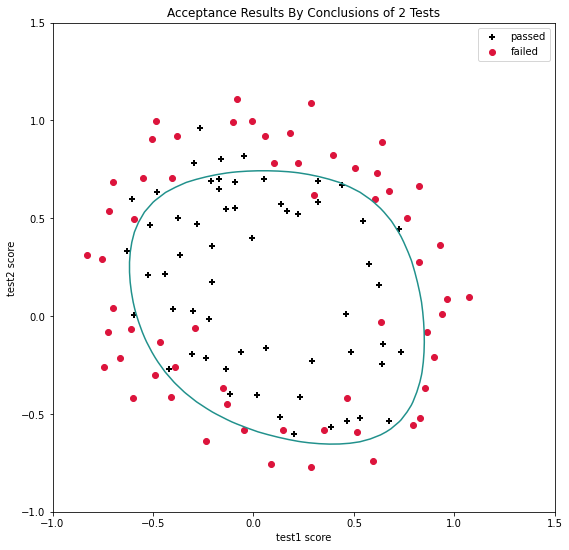

In [32]:
# Plotting the decision boundary
passed_2 = ex2r_df_fmap[ex2r_df['result'].isin([1])]
failed_2 = ex2r_df_fmap[ex2r_df['result'].isin([0])]

fig, ax = plt.subplots(figsize=(9,9))
ax.scatter(passed_2['10_polynomial'], passed_2['11_polynomial'], marker='+', c='k', lw=2, label='passed')
ax.scatter(failed_2['10_polynomial'], failed_2['11_polynomial'], marker='o', c='crimson', label='failed')
ax.set_xlabel('test1 score')
ax.set_ylabel('test2 score')
ax.set_title('Acceptance Results By Conclusions of 2 Tests')
ax.legend(loc=1)
plt.contour(u,v,z,0)